In [1]:
from data.databalancer import DataBalancer
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

sns.set(font='Times New Roman', font_scale=1.8, style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
matplotlib.rcParams['font.size'] = 18



databalancer = DataBalancer(random_seed=42)

language_authors_europe, language_chunks_europe, _ = databalancer.get_statistics('data/text_chunks/original/europe_data')
language_authors_non_europe, language_chunks_non_europe, _ = databalancer.get_statistics('data/text_chunks/original/non_europe_data')

language_authors_europe_balanced, language_chunks_europe_balanced, _ = databalancer.get_statistics('data/balanced/seed_42/europe_data', balanced=True)
language_authors_non_europe_balanced, language_chunks_non_europe_balanced, _ = databalancer.get_statistics('data/balanced/seed_42/non_europe_data', balanced=True)

Statistics: 
Found 29 languages in data/text_chunks/original/europe_data
 

        Total number of authors is: 5686
        Max number of authors per language is: 809 for English
        Min number of authors per language is: 104 for Lithuanian
        Average number of authors per language is: 247.2173913043478
        Median number of authors per language is: 172

        Total number of chunks is: 49685
        Max number of chunks per language: 6454 for English
        Min number of chunks per language: 758 for Serbian
        Average number of chunks per language is: 2160.217391304348
        Median number of chunks per language is: 1520

        Max number of chunks per author is: 744
        Min number of chunks per author is: 1
        Average number of chunks per author is 12.61273302849103
        Median number of chunks per author is 3
              
Statistics: 
Found 30 languages in data/text_chunks/original/non_europe_data
 

        Total number of authors is: 23263
   

In [2]:
# Create a figure with four barplots with seaborn. There should be a title for each plot and a super title for each two plots.
language_chunks_europe = {k: v for k, v in sorted(language_chunks_europe.items(), key=lambda item: item[0])}
language_authors_europe = {k: v for k, v in sorted(language_authors_europe.items(), key=lambda item: item[0])}

language_chunks_non_europe = {k: v for k, v in sorted(language_chunks_non_europe.items(), key=lambda item: item[0])}
language_authors_non_europe = {k: v for k, v in sorted(language_authors_non_europe.items(), key=lambda item: item[0])}

Text(0.5, 0, 'Number of authors')

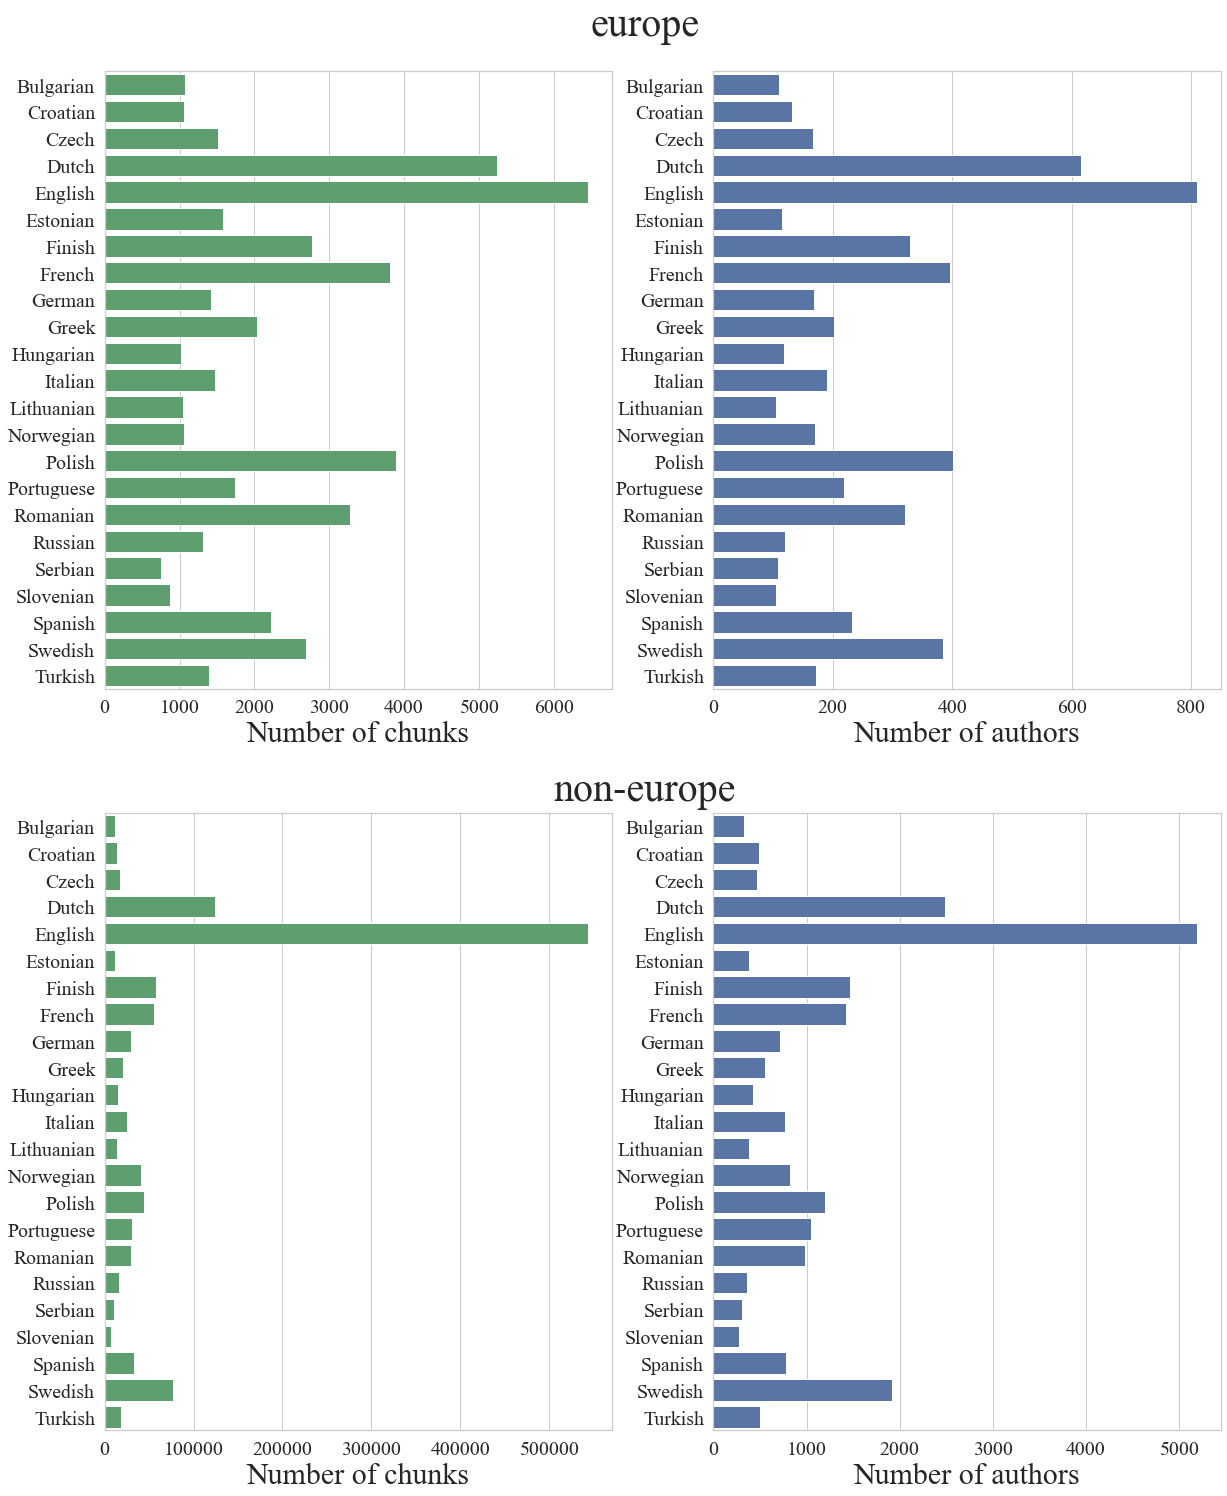

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(20, 25))
sns.barplot(x=list(language_chunks_europe.values()), y=list(language_chunks_europe.keys()), ax=axes[0, 0], orient='h', color='g')
sns.barplot(x=list(language_authors_europe.values()), y=list(language_authors_europe.keys()), ax=axes[0, 1], orient='h', color='b')
sns.barplot(x=list(language_chunks_non_europe.values()), y=list(language_chunks_non_europe.keys()), ax=axes[1, 0], orient='h', color='g')
sns.barplot(x=list(language_authors_non_europe.values()), y=list(language_authors_non_europe.keys()), ax=axes[1, 1], orient='h', color='b')

fig.text(0.5, 0.90, 'europe', ha='center', fontsize=40)
fig.text(0.5, 0.475, 'non-europe', ha='center', fontsize=40)

axes[0,0].set_xlabel('Number of chunks', fontsize=30)
axes[0,1].set_xlabel('Number of authors', fontsize=30)
axes[1,0].set_xlabel('Number of chunks', fontsize=30)
axes[1,1].set_xlabel('Number of authors', fontsize=30)

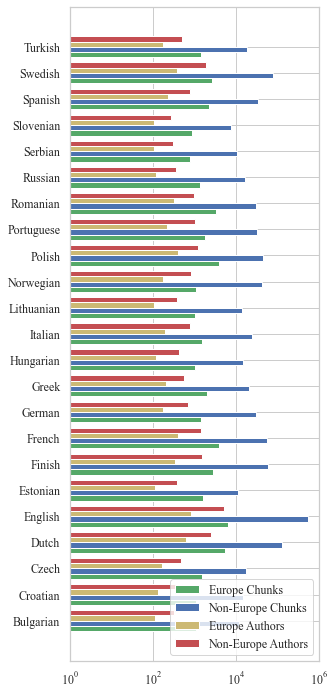

In [19]:
import matplotlib.pyplot as plt
import tikzplotlib

chunks_europe = list(language_chunks_europe.values())
authors_europe = list(language_authors_europe.values())
chunks_non_europe = list(language_chunks_non_europe.values())
authors_non_europe = list(language_authors_non_europe.values())
languages = list(language_chunks_europe.keys())

max_value_chunks = max(max(chunks_europe), max(chunks_non_europe))
max_value_authors = max(max(authors_europe), max(authors_non_europe))
max_value = max(max_value_chunks, max_value_authors)

bar_height = 0.2
index = range(len(languages))
fig, ax = plt.subplots(figsize=(5, 10))

# ax.barh(index, chunks_europe, height=bar_height, label='Europe Chunks', color='g')
# ax.barh(index, chunks_non_europe, height=bar_height, label='Non-Europe Chunks', color='b', left=chunks_europe)
# ax.barh(index, authors_europe, height=bar_height, label='Europe Authors', color='orange')
# ax.barh(index, authors_non_europe, height=bar_height, label='Non-Europe Authors', color='r', left=authors_europe)
# Plot stacked bars for Europe language chunks
ax.barh([i - 1.5 * bar_height for i in index], chunks_europe, height=bar_height, label='Europe Chunks', color='g')

# Plot stacked bars for Non-Europe language chunks
ax.barh([i - 0.5 * bar_height for i in index], chunks_non_europe, height=bar_height, label='Non-Europe Chunks', color='b')

# Plot stacked bars for Europe authors
ax.barh([i + 0.5 * bar_height for i in index], authors_europe, height=bar_height, label='Europe Authors', color='y')

# Plot stacked bars for Non-Europe authors
ax.barh([i + 1.5 * bar_height for i in index], authors_non_europe, height=bar_height, label='Non-Europe Authors', color='r')
ax.set_yticks(index)
ax.set_yticklabels(languages, fontsize=12)
ax.set_xscale('log')
ax.set_xlim(1, max_value+460000)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.legend(fontsize=12)

tikzplotlib.save("stacked_comparison.tikz")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'non-europe')

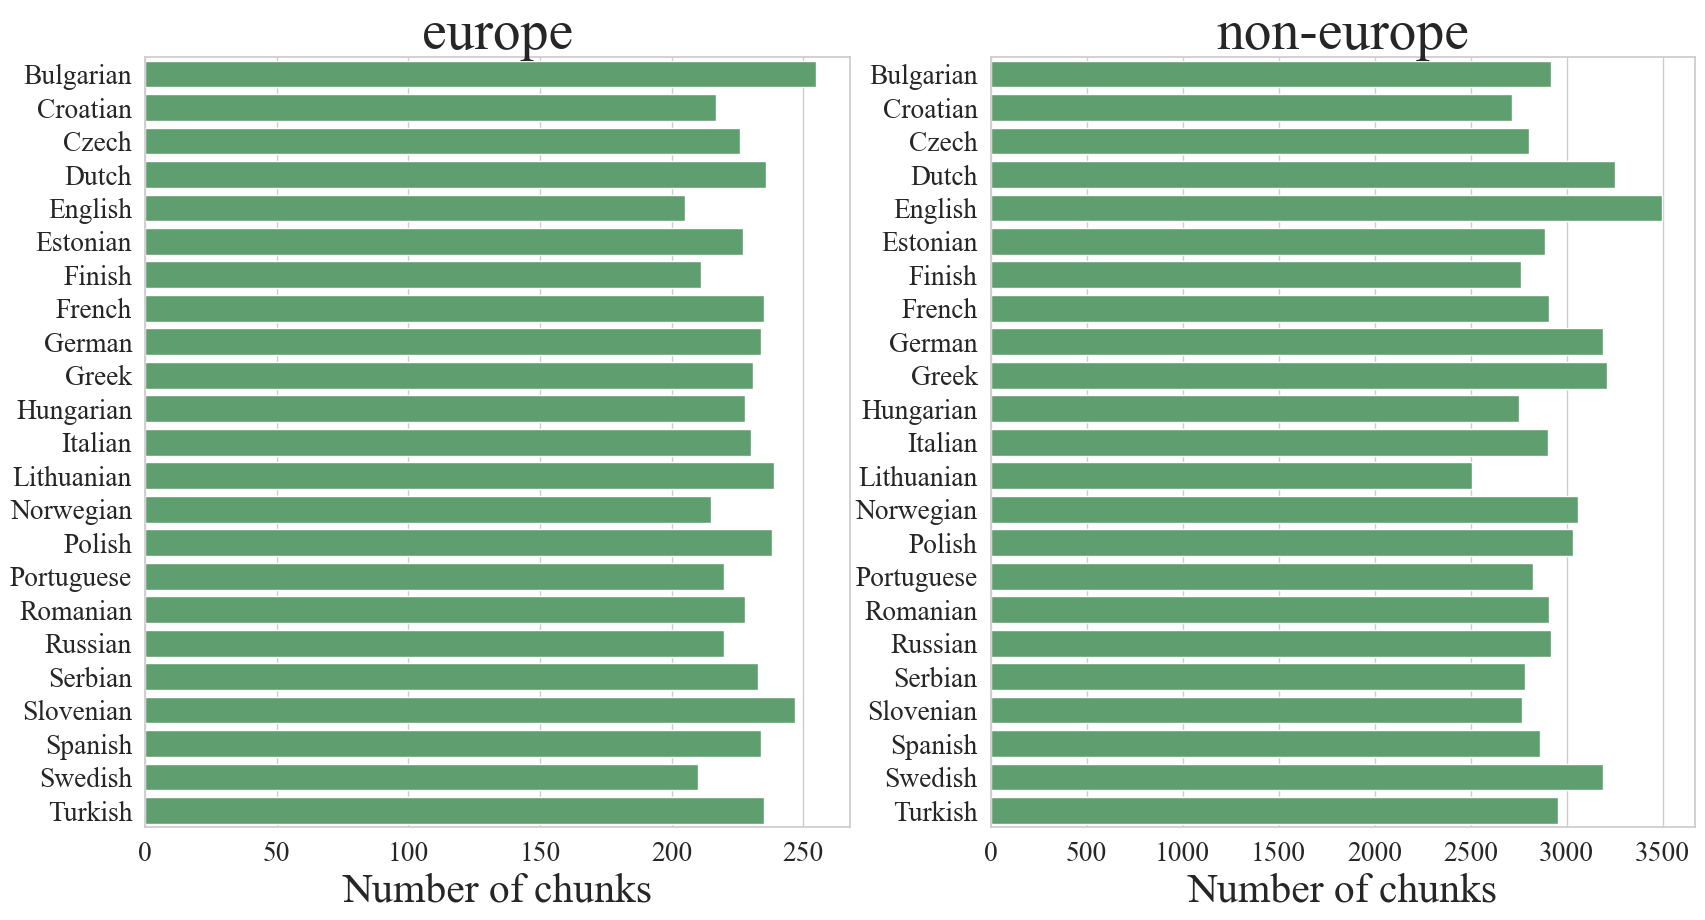

In [7]:
language_chunks_europe_balanced = {k: v for k, v in sorted(language_chunks_europe_balanced.items(), key=lambda item: item[0])}
language_authors_europe_balanced = {k: v for k, v in sorted(language_authors_europe_balanced.items(), key=lambda item: item[0])}

language_chunks_non_europe_balanced = {k: v for k, v in sorted(language_chunks_non_europe_balanced.items(), key=lambda item: item[0])}
language_authors_non_europe_balanced = {k: v for k, v in sorted(language_authors_non_europe_balanced.items(), key=lambda item: item[0])}

fig, (axe1, axe2) = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(x=list(language_chunks_europe_balanced.values()), y=list(language_chunks_europe_balanced.keys()), ax=axe1, orient='h', color='g')
sns.barplot(x=list(language_chunks_non_europe_balanced.values()), y=list(language_authors_europe_balanced.keys()), ax=axe2, orient='h', color='g')


axe1.set_xlabel('Number of chunks', fontsize=30)
axe2.set_xlabel('Number of chunks', fontsize=30)

axe1.set_title('europe', fontsize=40)
axe2.set_title('non-europe', fontsize=40)



Text(0, 0.5, 'Loss')

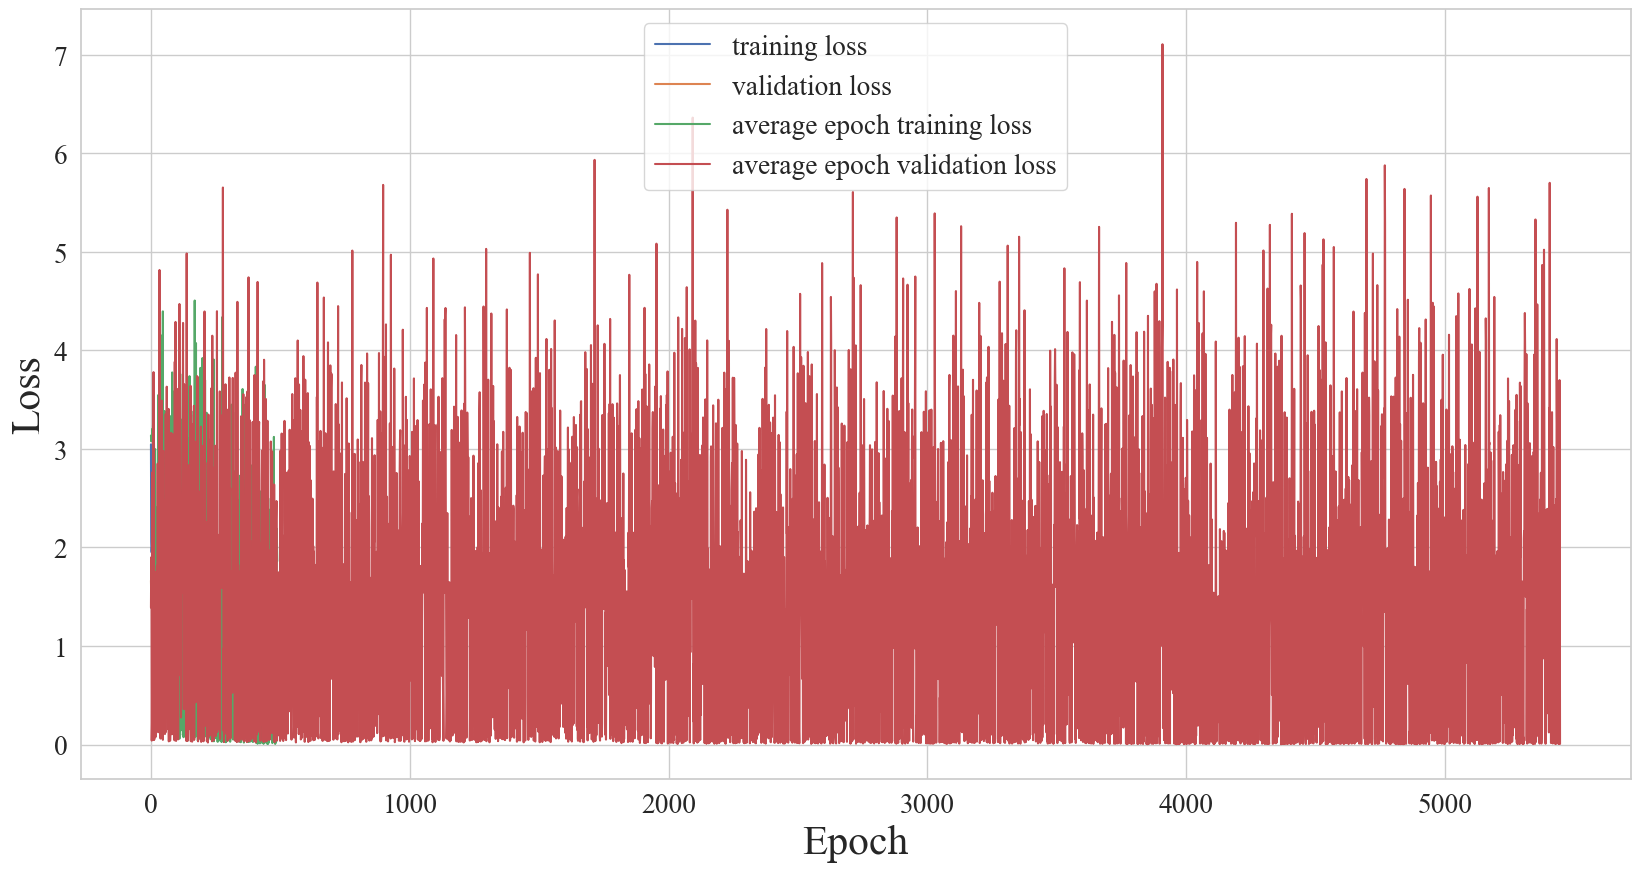

In [15]:
import pickle
from typing import List
import numpy as np

with open('fine_tuned_models/out_of_domain_training_loss_clean_chunks.pkl', 'rb') as f:
    big_bird_training_loss: List[List[float]] = pickle.load(f)

with open('fine_tuned_models/out_of_domain_validation_loss_clean_chunks.pkl', 'rb') as f:
    big_bird_validation_loss: List[List[float]] = pickle.load(f)


training_loss = [np.mean(values) for sublist in big_bird_training_loss for values in np.array_split(np.array(sublist), 10)]
validation_loss = [np.mean(values) for sublist in big_bird_validation_loss for values in np.array_split(np.array(sublist), 10)]

average_epoch_training_loss = [np.mean(sublist) for sublist in big_bird_training_loss]
average_epoch_validation_loss = [np.mean(sublist) for sublist in big_bird_validation_loss]

number_of_epochs = 3
# plot the training and validation loss of the big bird model with seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=range(len(training_loss)), y=training_loss, ax=ax, label='training loss')
sns.lineplot(x=range(len(validation_loss)), y=validation_loss, ax=ax, label='validation loss')
sns.lineplot(x=range(len(average_epoch_training_loss)), y=average_epoch_training_loss, ax=ax, label='average epoch training loss')
sns.lineplot(x=range(len(average_epoch_validation_loss)), y=average_epoch_validation_loss, ax=ax, label='average epoch validation loss')
ax.set_xlabel('Epoch', fontsize=30)
ax.set_ylabel('Loss', fontsize=30)

In [12]:
import pickle
from typing import List

with open('pickles/results/experiment_main/cv_accuracy_normal_chunks.pkl', 'rb') as f:
    cv_accuracy_normal: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_normal_normalized_chunks.pkl', 'rb') as f:
    cv_accuracy_normal_normalized: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bert_chunks.pkl', 'rb') as f:
    cv_accuracy_bert: List[float] = pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bert_fine_tuned_chunks.pkl', 'rb') as f:
    cv_accuracy_bert_fine_tuned: List[float]= pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bert_large_chunks.pkl', 'rb') as f:
    cv_accuracy_bert_large: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bert_large_fine_tuned_chunks.pkl', 'rb') as f: 
    cv_accuracy_bert_large_fine_tuned: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird: List[float] = pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_short_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_short: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_short_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned_short: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_long_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_long: List[float] = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_long_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned_long: List[float] = pickle.load(f)

In [7]:
cv_accuracy_bert

[0.32329209252286173,
 0.3044647660032275,
 0.31925766541151157,
 0.3087681549220011,
 0.3257127487896719,
 0.3082302313071544,
 0.30338891877353413,
 0.321226795803067,
 0.31988162496637074,
 0.3171912832929782]

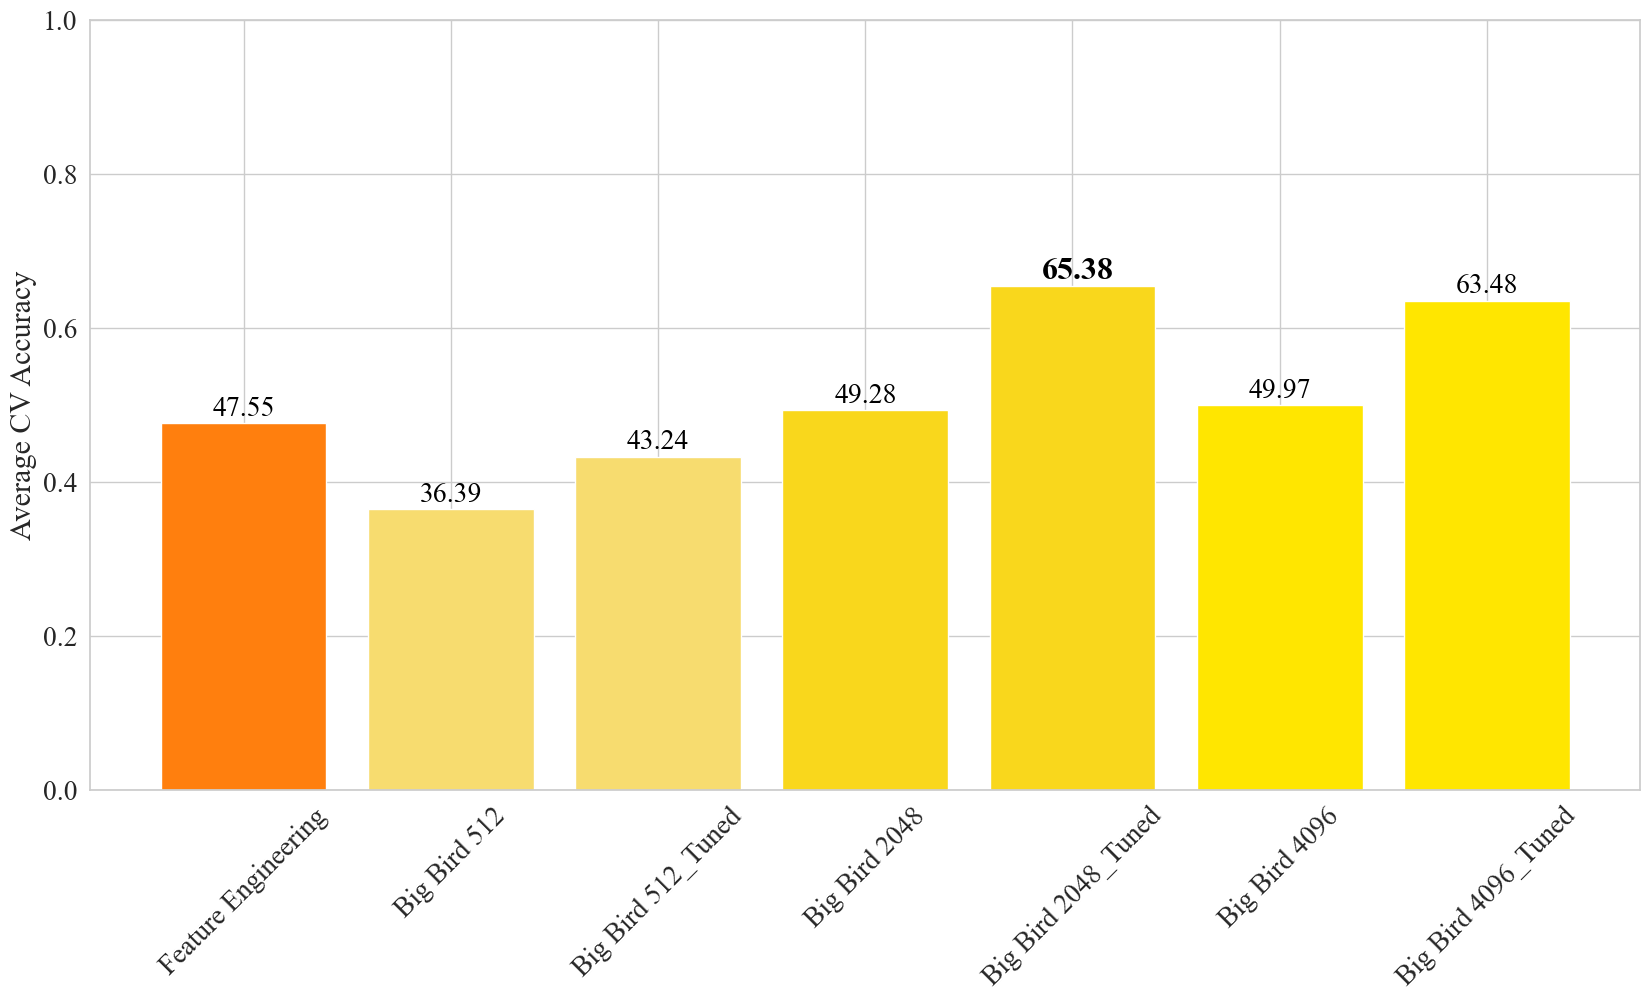

In [59]:
# create a barplot of cv_results of cv_accuracy_normal and cv_accuracy_bigbird with seaborn

plt.figure(figsize=(20, 10))
plt.bar(['Feature Engineering',  'Big Bird 512', 'Big Bird 512_Tuned', 'Big Bird 2048', 'Big Bird 2048_Tuned', 'Big Bird 4096', 'Big Bird 4096_Tuned'],
        [np.mean(cv_accuracy_normal), np.mean(cv_accuracy_bigbird_short),np.mean(cv_accuracy_bigbird_fine_tuned_short),
        np.mean(cv_accuracy_bigbird), np.mean(cv_accuracy_bigbird_fine_tuned),
        np.mean(cv_accuracy_bigbird_long), np.mean(cv_accuracy_bigbird_fine_tuned_long)],
        color=['#ff7f0e',  '#f7dc6f', '#f7dc6f','#f9d71c', '#f9d71c','#ffe600','#ffe600', ],)

plt.xticks(rotation=45)
plt.ylabel('Average CV Accuracy')
plt.ylim(0, 1)


for i, v in enumerate([np.mean(cv_accuracy_normal), np.mean(cv_accuracy_bigbird_short),np.mean(cv_accuracy_bigbird_fine_tuned_short),
        np.mean(cv_accuracy_bigbird), np.mean(cv_accuracy_bigbird_fine_tuned),
        np.mean(cv_accuracy_bigbird_long), np.mean(cv_accuracy_bigbird_fine_tuned_long)]):
    if not i is 4:
        plt.text(i-0.15, v+0.01, str(round(v * 100, 2)), color='black', fontsize=20)
    else:
        plt.text(i-0.15, v+0.01, str(round(v * 100, 2)), color='black', fontweight='bold', fontsize=23)



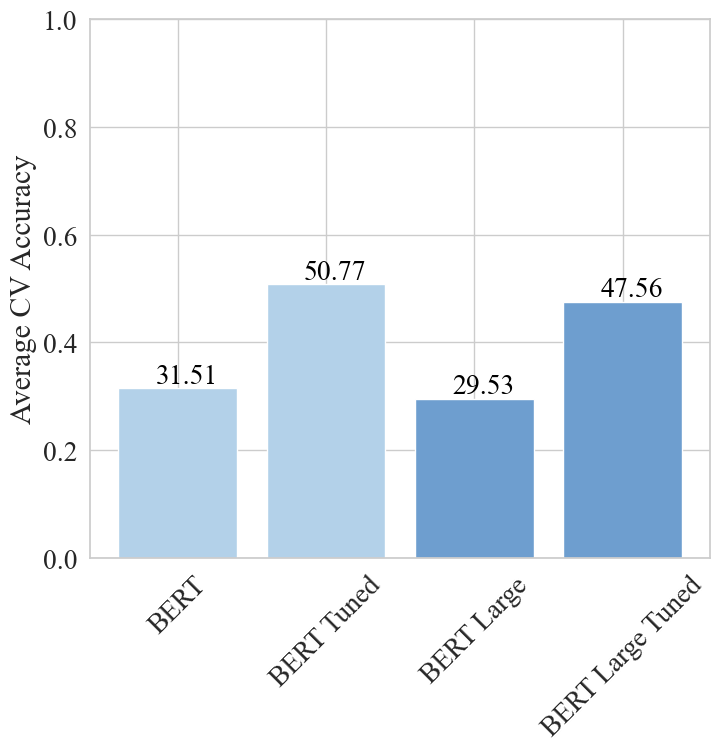

In [73]:
plt.figure(figsize=(8, 7))
plt.bar(['BERT',  'BERT Tuned', 'BERT Large', 'BERT Large Tuned'],
        [np.mean(cv_accuracy_bert), np.mean(cv_accuracy_bert_fine_tuned), np.mean(cv_accuracy_bert_large), np.mean(cv_accuracy_bert_large_fine_tuned)],
        color=['#b3d1e9','#b3d1e9', '#6e9ecf', '#6e9ecf'])

plt.xticks(rotation=45)
plt.ylabel('Average CV Accuracy')
plt.ylim(0, 1)


for i, v in enumerate([np.mean(cv_accuracy_bert), np.mean(cv_accuracy_bert_fine_tuned), np.mean(cv_accuracy_bert_large), np.mean(cv_accuracy_bert_large_fine_tuned)]):
    plt.text(i-0.15, v+0.01, str(round(v * 100, 2)), color='black', fontsize=20)

In [2]:
with open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_chunks.pkl', 'rb') as f:
    out_of_domain_X_bigbird = pickle.load(f)
with open('pickles/pickled_datasets/seed_42/out_of_domain_X_normal_chunks.pkl', 'rb') as f:
    out_of_domain_X_normal = pickle.load(f)
with open('pickles/pickled_datasets/seed_42/out_of_domain_y_chunks.pkl', 'rb') as f:
    out_of_domain_y = pickle.load(f)


In [25]:
df = pd.DataFrame(out_of_domain_X_bigbird)
df['label'] = out_of_domain_y
centroids = df.groupby('label').mean().to_numpy()
labels = list(range(0,23))

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(out_of_domain_X_bigbird)
X_pca = pca.transform(out_of_domain_X_bigbird)

df = pd.DataFrame(X_pca, columns=['x', 'y'])
df['label'] = out_of_domain_y

centroids = df.groupby('label').mean().to_numpy()
labels = list(range(0,23))

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(out_of_domain_X_bigbird)

df = pd.DataFrame(X_tsne, columns=['x', 'y'])
df['label'] = out_of_domain_y

centroids = df.groupby('label').mean().to_numpy()
labels = list(range(0,23))

/home/sergey/.pyenv/versions/3.7.0/envs/sergey_thesis/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/sergey/.pyenv/versions/3.7.0/envs/sergey_thesis/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [18]:
tsne_normal = TSNE(n_components=2, random_state=42)
X_tsne_normal = tsne_normal.fit_transform(out_of_domain_X_normal)

df_normal = pd.DataFrame(X_tsne_normal, columns=['x', 'y'])
df_normal['label'] = out_of_domain_y

centroids_normal = df_normal.groupby('label').mean().to_numpy()

/home/sergey/.pyenv/versions/3.7.0/envs/sergey_thesis/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/sergey/.pyenv/versions/3.7.0/envs/sergey_thesis/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
from data.dataprocessor import DataProcessor
dp = DataProcessor('google/bigbird-roberta-base')

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

label2color = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'yellow',
    4: 'black',
    5: 'purple',
    6: 'orange',
    7: 'pink',
    8: 'brown',
    9: 'gray',
    10: 'cyan',
    11: 'magenta',
    12: 'olive',
    13: 'lime',
    14: 'teal',
    15: 'coral',
    16: 'navy',
    17: 'tan',
    18: 'gold',
    19: 'darkgreen',
    20: 'darkblue',
    21: 'darkred',
    22: 'darkorange',
    23: 'darkviolet'
}
label2language = {v: k for k, v in dp.language2label.items()}

for i in range(0, len(centroids)):
    axes[0].scatter(centroids[i][0], centroids[i][1], color=label2color[i])
    axes[0].text(centroids[i][0], centroids[i][1], label2language[i], fontsize=20)

    axes[1].scatter(centroids_normal[i][0], centroids_normal[i][1], color=label2color[i])
    axes[1].text(centroids_normal[i][0], centroids_normal[i][1], label2language[i], fontsize=20)

axes[0].set_title('Big Bird Embeddings', fontsize=20)
axes[1].set_title('Feature Engineering', fontsize=20)

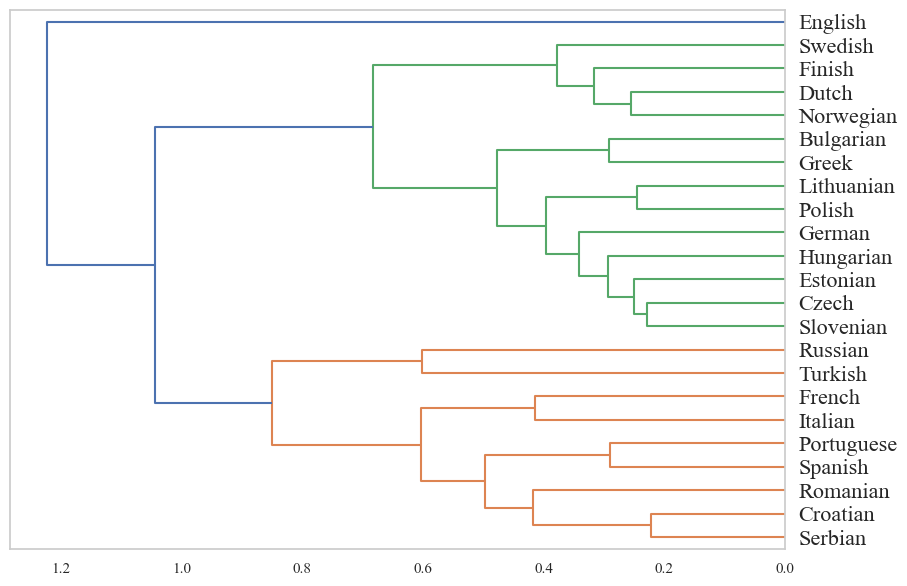

In [48]:
# create a hyrarchical clustering dendrogram of the out of domain data

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(centroids, 'ward')
languages = [label2language[i] for i in labels]

# set bacground color to white
sns.set_style('whitegrid', {'axes.grid' : False})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

plt.figure(figsize=(10, 7))
Z = dendrogram(linked,
            orientation='left',
            labels=languages,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=16)
            
plt.show()